In [ ]:
!pip install keras

In [1]:
#!pip install tensorflow

In [2]:
# LSTM for debits journaliers
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [6]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pd.read_excel('calagesimulation.xlsx', usecols=[0])
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([[ 9.56 ],
       [ 9.433],
       [ 9.433],
       ...,
       [15.74 ],
       [15.34 ],
       [15.07 ]], dtype=float32)

In [9]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [14]:
# split into train and test sets
train_size = int(len(dataset) *(8/9))
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2918/2918 - 10s - loss: 0.0116 - 10s/epoch - 3ms/step
Epoch 2/100
2918/2918 - 10s - loss: 2.3780e-04 - 10s/epoch - 4ms/step
Epoch 3/100
2918/2918 - 10s - loss: 2.3039e-04 - 10s/epoch - 3ms/step
Epoch 4/100
2918/2918 - 10s - loss: 2.2221e-04 - 10s/epoch - 4ms/step
Epoch 5/100
2918/2918 - 7s - loss: 2.2424e-04 - 7s/epoch - 2ms/step
Epoch 6/100
2918/2918 - 8s - loss: 2.2744e-04 - 8s/epoch - 3ms/step
Epoch 7/100
2918/2918 - 7s - loss: 2.2211e-04 - 7s/epoch - 2ms/step
Epoch 8/100
2918/2918 - 8s - loss: 2.2469e-04 - 8s/epoch - 3ms/step
Epoch 9/100
2918/2918 - 8s - loss: 2.2411e-04 - 8s/epoch - 3ms/step
Epoch 10/100
2918/2918 - 7s - loss: 2.2147e-04 - 7s/epoch - 2ms/step
Epoch 11/100
2918/2918 - 8s - loss: 2.3046e-04 - 8s/epoch - 3ms/step
Epoch 12/100
2918/2918 - 8s - loss: 2.2560e-04 - 8s/epoch - 3ms/step
Epoch 13/100
2918/2918 - 8s - loss: 2.2533e-04 - 8s/epoch - 3ms/step
Epoch 14/100
2918/2918 - 8s - loss: 2.1589e-04 - 8s/epoch - 3ms/step
Epoch 15/100
2918/2918 - 7s - loss: 2.1

In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

12/12 [==============================] - 0s 2ms/step


In [22]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.014 RMSE
Test Score: 0.013 RMSE


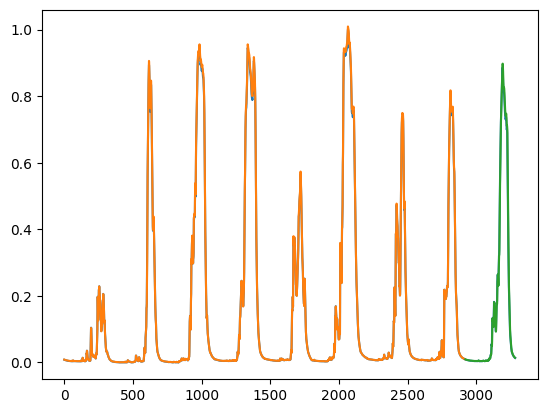

In [23]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[0:len(trainPredict), :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Nouvelle section